In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

In [131]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [132]:
churn_df = churn_data.copy()
churn_df = churn_df.drop(columns='RowNumber')
churn_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


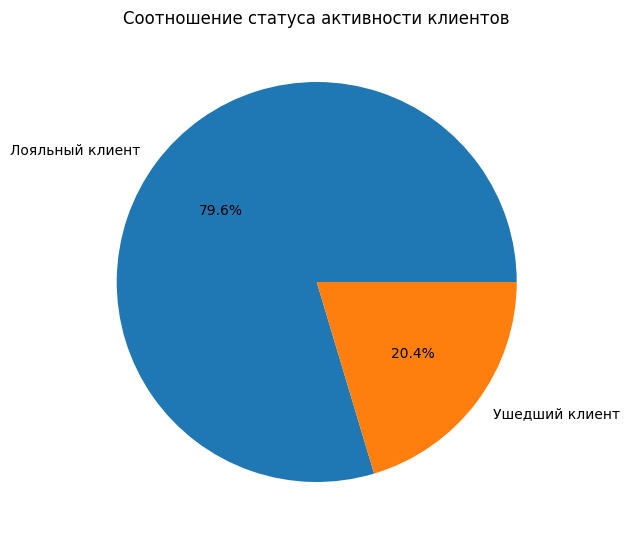

In [133]:
# Задание №9.1
clients_status = churn_df['Exited'].value_counts()
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0, 0, 1, 1])
pieplot = axes.pie(
    clients_status,
    labels=['Лояльный клиент', 'Ушедший клиент'],
    autopct='%.1f%%',
)
title = axes.set_title('Соотношение статуса активности клиентов')
plt.show(pie)



По графику видно, что в банке остаются практический 80% клиентов банка. И чуть больше 1/5 всех клиентов закрывают счет.

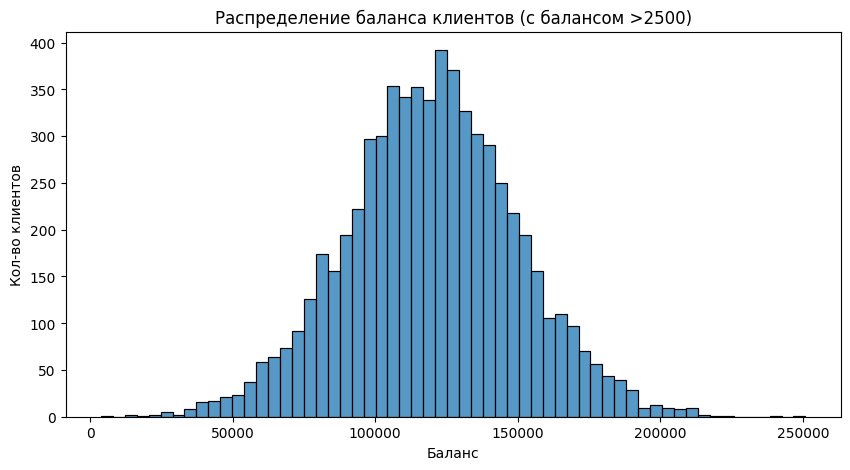

In [134]:
#Задание 9.2
sorted_balance_df = churn_df[churn_df['Balance'] > 2500.00]
fig = plt.figure(figsize=(10, 5))
histplot = sns.histplot(
    data=sorted_balance_df,
    x='Balance'
).set(title='Распределение баланса клиентов (с балансом >2500)', xlabel = 'Баланс', ylabel = 'Кол-во клиентов')

Если отбросить самую распространенную группу людей с балансом <= 2500, то может показаться, что подавляющее большинство клиентов банка состоятельные люди, которые имеет баланс в банке между 75000 и 175000.

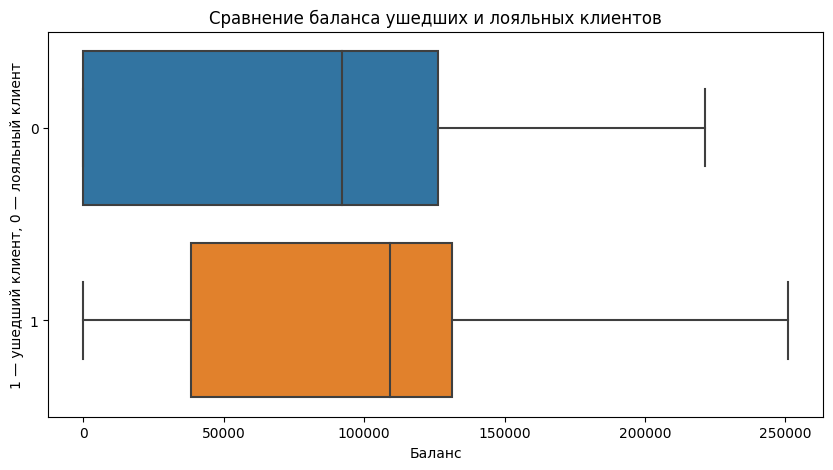

In [135]:
#Задание 9.3
fig = plt.figure(figsize=(10, 5))
boxplot = sns.boxplot(
    data=churn_df,
    y='Exited',
    x='Balance',
    orient='h'
).set(title='Сравнение баланса ушедших и лояльных клиентов', xlabel = 'Баланс', ylabel = '1 — ушедший клиент, 0 — лояльный клиент')

По графику видно, что более обесеченные клиенты перестают пользоваться услугами банка. Вероятно это связано с низким качеством сервиса или с потерей доверия к надежности банка. 
Вопрос для ментора: Как изменить на графике 0 и 1 на другие значения "Ушедшие" и "Лояльные". Я смог только поменять название оси y, но хотелось бы изменить на рафике название индекса жлекментов.

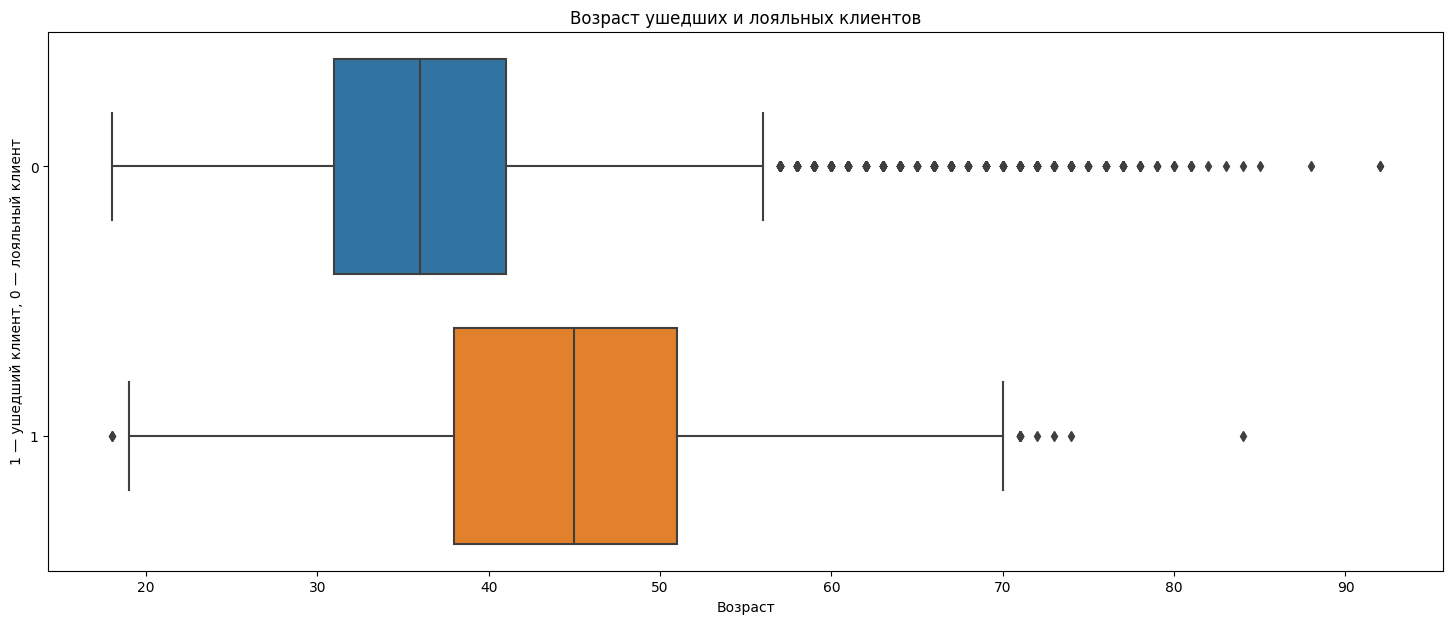

In [136]:
#Задание 9.4
fig = plt.figure(figsize=(18, 7))
barplot = sns.boxplot(
    data=churn_df,
    x='Age',
    y='Exited',
    orient='h'
).set(title='Возраст ушедших и лояльных клиентов', xlabel = 'Возраст', ylabel = '1 — ушедший клиент, 0 — лояльный клиент')

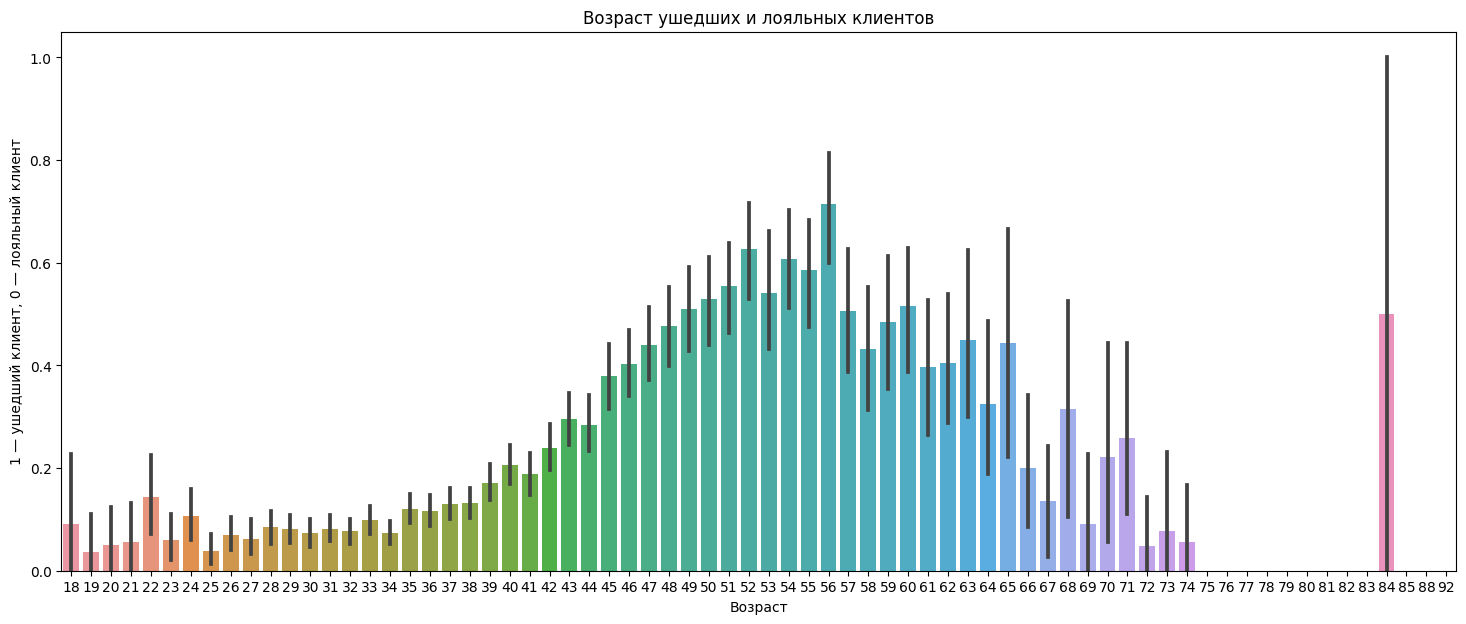

In [137]:
fig = plt.figure(figsize=(18, 7))
barplot = sns.barplot(
    data=churn_df,
    x='Age',
    y='Exited'
).set(title='Возраст ушедших и лояльных клиентов', xlabel = 'Возраст', ylabel = '1 — ушедший клиент, 0 — лояльный клиент')

Построил два графика, думаю первый более читаемы, но по столбчатой диаграмме в целом тоже видно на какую категорию надо обратить внимание, но не понятны выбросы. 
По графикам видно, что лояльная аудитория у банка в среднем от 30 до 40 лет. В основном люди перестают быть клиентами банка после 40 лет. Так что именно на эту категорию банку нужно обратить внимание.
Потенциальных выбросов больше в категории лояльных клиентов.


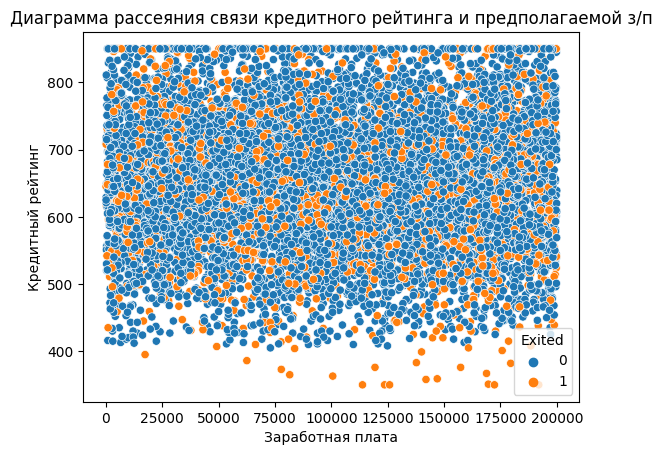

In [138]:
#Задание 9.5
scatterplot = sns.scatterplot(
    data=churn_df,
    x='EstimatedSalary',
    y='CreditScore',
    hue='Exited'
).set(title='Диаграмма рассеяния связи кредитного рейтинга и предполагаемой з/п', xlabel = 'Заработная плата', ylabel = 'Кредитный рейтинг')

Явной взаимосвязи между кредитным рейтингом и предполагаемой заработной платы не вижу. Единственное видно, что все клиенты с кредитным рейтингом < 400 не являются клиентами банка.

In [139]:
#Задание 9.6
churn_gender = churn_df.groupby(
    'Gender').mean()['Exited']*100

fig = px.bar(
    data_frame=churn_gender,
    x=churn_gender.index,
    y=churn_gender,
    color=churn_gender.index,
    labels={'Gender': 'Пол', 'y': 'Доля от численности группы (%)'},
    category_orders={'Пол': ['Мужчины', 'Женщины']},
    title='Отток клиентов в гендерных группах',
    width=500,
    height=600 
)
fig.show();

C:\Users\korol\AppData\Local\Temp\ipykernel_4596\2841378974.py:3: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Чаще из банка уходят женщины.
Тот же вопрос: можно ли изменить вывод на график индекса male и female на мой текст?

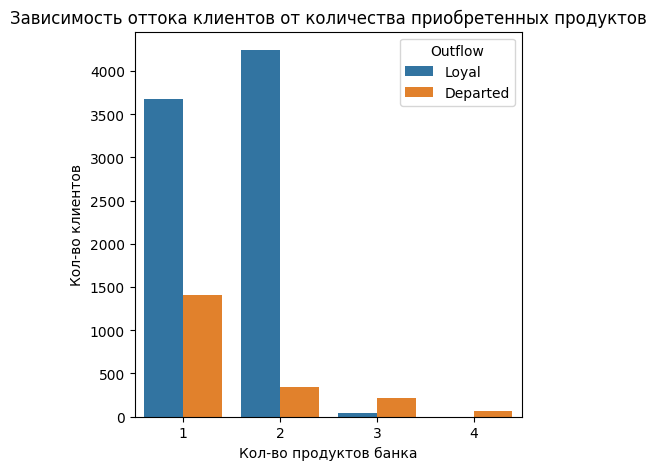

In [140]:
#Задание 9.7
churn_df['Outflow'] = churn_df['Exited'].apply(
    lambda x: 'Departed' if x else 'Loyal').astype('category')

fig=plt.figure(figsize=(5, 5))
countplot = sns.countplot(
    data=churn_df,
    x='NumOfProducts',
    hue='Outflow',
    hue_order=['Loyal', 'Departed']
).set(title='Зависимость оттока клиентов от количества приобретенных продуктов', xlabel = 'Кол-во продуктов банка', ylabel = 'Кол-во клиентов')


In [141]:
bar_data = churn_df.groupby(['NumOfProducts', 'Exited'], as_index=False).count()
fig = px.bar(
    bar_data,
    x='NumOfProducts',
    y='CustomerId',
    height=500,
    width=1000,
    color="Exited",
    title="Зависимость оттока клиентов от количества приобретенных продуктов"
)
fig.update_layout(xaxis_title="Кол-во продуктов банка", yaxis_title="Кол-во клиентов")
fig.update_layout(barmode='stack')
fig.show()

Чем большим кол-вом услуг пользуются клиенты, тем в большем процентном соотношении они перестают быть клиентами банка. 
Вопрос: Не очень понимаю почему в графиках отличается результат вывода?

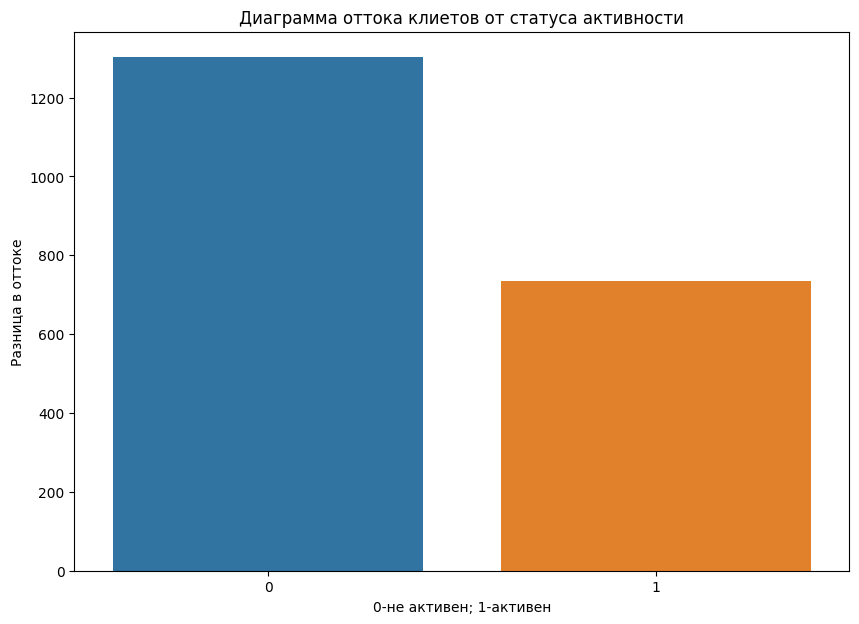

In [142]:
#Задание 9.8
fig = plt.figure(figsize=(10, 7))
bar_data=churn_df.groupby(['IsActiveMember'], as_index=False)['Exited'].sum()
barplot = sns.barplot(
    data=bar_data,
    x='IsActiveMember',
    y='Exited'
).set(title='Диаграмма оттока клиетов от статуса активности', ylabel = 'Разница в оттоке', xlabel = '0-не активен; 1-активен')

По диаграмме видно, что не активные клиенты уходят чаще. Для уменьшения оттока можно при получении клиентом статуса "не активный" выдавать ему специальное предложение/скидку на обслуживание итд.

In [143]:
#Задание 9.9
geography_dt = round(churn_df.groupby(['Geography'], as_index=False)['Exited'].mean(), 2)

fig = px.choropleth(
    data_frame=geography_dt,
    locations="Geography",
    locationmode = "country names",
    color= 'Exited', 
    title='Карта оттока клиентов по странам',
    width=800,
    height=500,
    color_continuous_scale='Rainbow'
)
fig.show()

Больше всего доля ушедших клиентов из Германии.

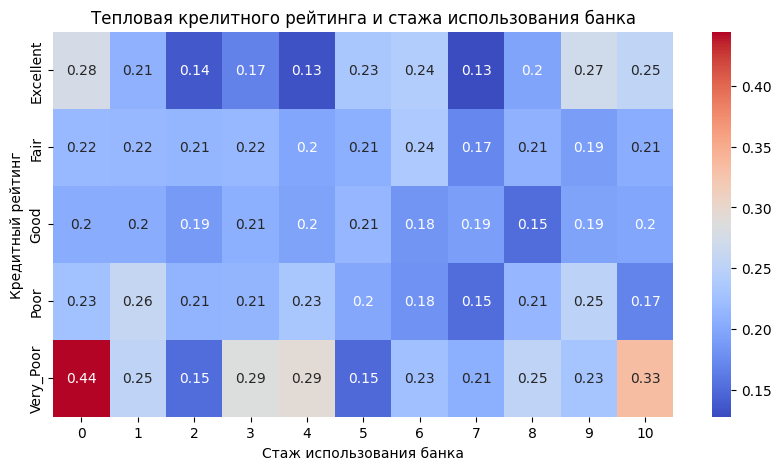

In [144]:
#Задание 9.10
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_df['CreditScoreCat'] = churn_df['CreditScore'].apply(get_credit_score_cat)
pivot = churn_df.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
    aggfunc='mean'
)
pivot.columns = pivot.columns.astype('string')
fig = plt.figure(figsize=(10, 5))

heatmap = sns.heatmap(data=pivot, cmap='coolwarm', annot=True).set(title='Тепловая крелитного рейтинга и стажа использования банка', 
                                                     ylabel = 'Кредитный рейтинг', xlabel = 'Стаж использования банка')

Чаще всего уходят клиенты с очень плохой кредитной исторей в первые 4 года. Также наоборот, часто уходят клиенты с отличной кредитной историей которые только начали пользоваться банком или наоборот пользуются им очень давно.